# Введение
Задаём входные данные

In [325]:
#Температура пара
temp_vapor = 403  # K
#Температура жидкости
temp_liquid = 333 # K
#Длина тепловой трубы
length = 5 # m
#Внутренний диаметр паропровода
diameter_vapor = 6 # mm
#Внутренний диаметр конденсаторопровода
diameter_liquid = 3 # mm
#Плоский испаритель с площадью подвода тепла
space_input = 100 # mm^2
#Параметр капилярной структуры
molecule_structure0 = 0.037 

Ввод табличных данных для этиленгликоля

In [326]:
temperature = [273, 293, 313, 333, 353, 373, 393, 413, 473, 523]                            # K
p_s         = [0.000049, 0.00019, 0.00069, 0.0021, 0.0067, 0.021, 0.053, 0.129, 1.013, 4.2] # 10**5 Па
h_ev        = [994, 974, 956, 938, 920, 902, 885, 868, 788, 780]                            # кДж/кг
p_l         = [1131, 1117, 1101, 1088, 1078, 1059, 1045, 1032, 993, 965]                    # кг/м^2
p_v         = [0.0016, 0.004, 0.009, 0.021, 0.044, 0.09, 0.17, 0.33, 1.6, 6.7]              # кг/м^2
n_l         = [65000, 21000, 9600, 5200, 3200, 2150, 1150, 650, 230, 60]                    # 10^-6 Па*с
n_v         = [5, 5.35, 5.7, 6.05, 6.4, 6.75, 7.1, 7.45, 8.49, 9.35]                        # 10^-6 Па*с
c_p_l       = [2295, 2386, 2476, 2565, 2656, 2750, 2830, 2920, 3130,3451]                   # Дж/кг*К
sygma       = [48.0, 46.0, 44.5, 42.5, 40.5, 38.5, 36.6, 34.6, 28.6, 22.8]                  # 10^-3 Н/м
lambda_l    = [0.254, 0.257, 0.259, 0.262, 0.265, 0.267, 0.274, 0.278, 0.29, 0.303]         # Вт/м*К

Приводим с системе СИ

In [327]:
diameter_vapor = diameter_vapor * 0.001 # m
diameter_liquid = diameter_liquid * 0.001 # m
space_imput = space_input * (0.001**2) # m^2
p_s = [x * (10**5) for x in p_s]
h_ev = [x * 1000 for x in h_ev] # Дж/кг
n_l = [x * (10**-6) for x in n_l] # Па*с
n_v = [x * (10**-6) for x in n_v] # Па*с
sygma = [x * (10**-3) for x in sygma] # Н/м

Выведем данные в виде таблицы

In [328]:
with open('table_proprieties.txt', 'w') as file:
    for i in range(0,10):
        print( '%d %.2e %.2e %.2e %.2e %.2e %.2e %.2e %.2e %.2e' % 
              (temperature[i], p_s[i], h_ev[i], p_l[i], p_v[i], n_l[i], 
              n_v[i], c_p_l[i], sygma[i], lambda_l[i]), sep='\t ')

273 4.90e+00 9.94e+05 1.13e+03 1.60e-03 6.50e-02 5.00e-06 2.30e+03 4.80e-02 2.54e-01
293 1.90e+01 9.74e+05 1.12e+03 4.00e-03 2.10e-02 5.35e-06 2.39e+03 4.60e-02 2.57e-01
313 6.90e+01 9.56e+05 1.10e+03 9.00e-03 9.60e-03 5.70e-06 2.48e+03 4.45e-02 2.59e-01
333 2.10e+02 9.38e+05 1.09e+03 2.10e-02 5.20e-03 6.05e-06 2.56e+03 4.25e-02 2.62e-01
353 6.70e+02 9.20e+05 1.08e+03 4.40e-02 3.20e-03 6.40e-06 2.66e+03 4.05e-02 2.65e-01
373 2.10e+03 9.02e+05 1.06e+03 9.00e-02 2.15e-03 6.75e-06 2.75e+03 3.85e-02 2.67e-01
393 5.30e+03 8.85e+05 1.04e+03 1.70e-01 1.15e-03 7.10e-06 2.83e+03 3.66e-02 2.74e-01
413 1.29e+04 8.68e+05 1.03e+03 3.30e-01 6.50e-04 7.45e-06 2.92e+03 3.46e-02 2.78e-01
473 1.01e+05 7.88e+05 9.93e+02 1.60e+00 2.30e-04 8.49e-06 3.13e+03 2.86e-02 2.90e-01
523 4.20e+05 7.80e+05 9.65e+02 6.70e+00 6.00e-05 9.35e-06 3.45e+03 2.28e-02 3.03e-01


Сделаем абстракцию для расчёта полиномов

In [329]:
import numpy as np
from IPython.display import Latex

class polinome5:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.coeficients = np.polyfit(x,y,5)
    
    def __str__(self):
        text = 'f(x) = '
        counter = 0
        for i in self.coeficients[::-1]:
            text = text + str( '%.3e' % (i)) + ' * X^' + str(counter) + ' + '
            counter += 1
        return text
    
    def latexPrint(self):
        return Latex(r'\begin{eqnarray} f(x) = ' 
            + str( '(%.3e)' % (self.coeficients[5])) +
        '+' + str( '(%.3e)' % (self.coeficients[4])) + '* x' +
        '+' + str( '(%.3e)' % (self.coeficients[3])) + '* x^2' +
        '+' + str( '(%.3e)' % (self.coeficients[2])) + '* x^3' +
        '+' + str( '(%.3e)' % (self.coeficients[1])) + '* x^4' +
        '+' + str( '(%.3e)' % (self.coeficients[5])) + '* x^5' +
        r'\end{eqnarray}')
        
        
    
    def approx_func(self, x):
        a0 = self.coeficients[5]
        a1 = self.coeficients[4]
        a2 = self.coeficients[3]
        a3 = self.coeficients[2]
        a4 = self.coeficients[1]
        a5 = self.coeficients[0]
        
        return a0 + a1*x + a2*(x**2) + a3*(x**3) + a4*(x**4) + a5*(x**5)
    
    def error(self):
        f = [self.approx_func(i) for i in self.x]
        error = [abs((i-j)/i) for i in self.y for j in f]
        return max(error)
            
        
h_ev_poly = polinome5(temperature, h_ev)
h_ev_poly.error()

0.2736560065365086

In [330]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
x = range(260,540,3)

Проверим полиномы

In [331]:
def table_poly(x):
    a0 = -5.307*10**7
    a1 = 9.204*10**5
    a2 = -6.182*10**3
    a3 = 2.049*10
    a4 = -3.35*10**-2
    a5 = 2.167*10**-5  
        
    return a0 + a1*x + a2*(x**2) + a3*(x**3) + a4*(x**4) + a5*(x**5)

h_ev_poly.latexPrint()

<IPython.core.display.Latex object>

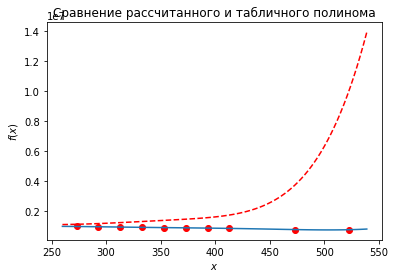

In [332]:
y1 = [h_ev_poly.approx_func(i) for i in x]
y2 = [table_poly(i) for i in x]

line_h_ev_example = plt.plot(temperature, h_ev, 'ro')
line_h_ev_example = plt.plot(x, y1)
line_h_ev_example = plt.plot(x, y2, 'r--')
line_h_ev_example = plt.xlabel(r'$x$')
line_h_ev_example = plt.ylabel(r'$f(x)$')
line_h_ev_example = plt.title('Сравнение рассчитанного и табличного полинома')

Видно, что приведённые в книге полиномы сильноотличаются от расчётных, а значения леат далеко от заданных точек.

## Рассчёт полиномов

In [333]:
def diff_graph(poly, points):
    %matplotlib inline
    y = [poly.approx_func(i) for i in x]
    area = plt.plot(temperature, points, 'ro')
    area = plt.plot(x, y)
    area = plt.xlabel(r'$x$')
    area = plt.ylabel(r'$f(x)$')
    area = plt.title('Табличные значения и апроксимирующий полином')
    

In [334]:
%%latex
$$ln(P_s),Па$$

<IPython.core.display.Latex object>

In [335]:
ln_ps = [np.log(x) for x in p_s]
ln_ps_poly = polinome5(temperature,ln_ps)
ln_ps_poly.latexPrint()

<IPython.core.display.Latex object>

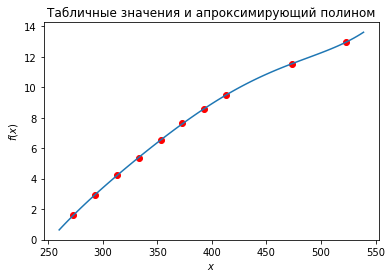

In [336]:
diff_graph(ln_ps_poly, ln_ps)

In [337]:
ln_ps_poly.error()

7.147721469914589

In [338]:
%%latex
$$H_{ev},Дж/кг$$

<IPython.core.display.Latex object>

In [339]:
h_ev_poly = polinome5(temperature, h_ev)
h_ev_poly.latexPrint()

<IPython.core.display.Latex object>

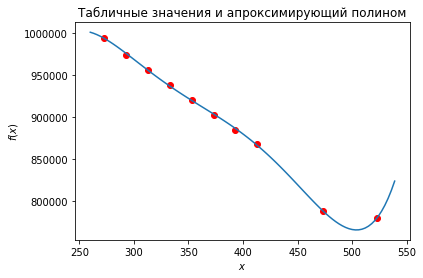

In [340]:
diff_graph(h_ev_poly, h_ev)

In [341]:
h_ev_poly.error()

0.2736560065365086

In [342]:
%%latex
$$\rho_l,кг/м^3$$

<IPython.core.display.Latex object>

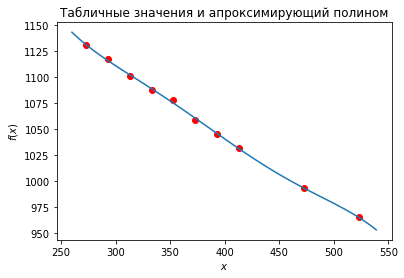

In [343]:
p_l_poly = polinome5(temperature, p_l)
p_l_poly.latexPrint()

%matplotlib inline
diff_graph(p_l_poly, p_l)

In [344]:
p_l_poly.error()

0.17227854046381197

In [345]:
%%latex
$$ln(\rho_v),кг/м^3$$

<IPython.core.display.Latex object>

In [346]:
ln_pv = [np.log(x) for x in p_v]
ln_pv_poly = polinome5(temperature,ln_pv)
ln_pv_poly.latexPrint()

<IPython.core.display.Latex object>

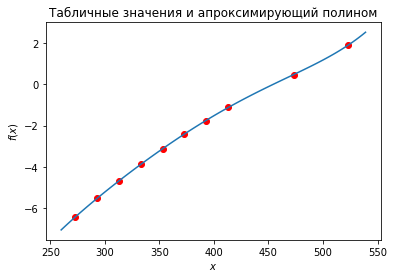

In [347]:
diff_graph(ln_pv_poly, ln_pv)

In [348]:
ln_pv_poly.error()

14.694702699440171

In [349]:
%%latex
$$ln(\eta_l),Па*с$$

<IPython.core.display.Latex object>

In [350]:
ln_nl = [np.log(x) for x in n_l]
ln_nl_poly = polinome5(temperature,ln_nl)
ln_nl_poly.latexPrint()

<IPython.core.display.Latex object>

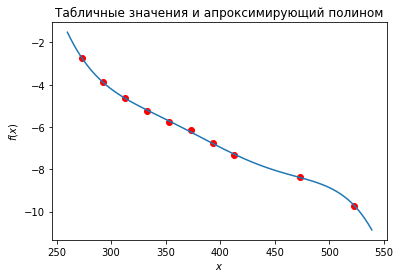

In [351]:
%matplotlib inline

diff_graph(ln_nl_poly, ln_nl)

In [352]:
ln_nl_poly.error()

2.555828867280921

In [353]:
%%latex
$$\eta_v,Па*с$$

<IPython.core.display.Latex object>

In [354]:
n_v_poly = polinome5(temperature, n_v)
n_v_poly.latexPrint()

<IPython.core.display.Latex object>

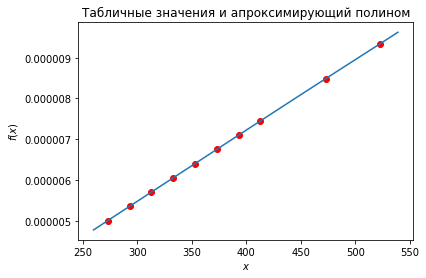

In [355]:
%matplotlib inline

diff_graph(n_v_poly, n_v)

In [356]:
n_v_poly.error()

0.869998217003589

In [357]:
%%latex
$$c_{p,l},Дж/кг*К$$

<IPython.core.display.Latex object>

In [358]:
c_p_l_poly = polinome5(temperature, c_p_l)
c_p_l_poly.latexPrint()

<IPython.core.display.Latex object>

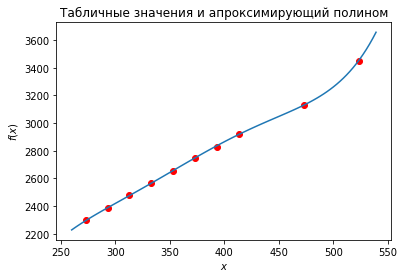

In [359]:
diff_graph(c_p_l_poly, c_p_l)

In [360]:
c_p_l_poly.error()

0.5036779075169333

In [361]:
%%latex
$$\sigma,Н/м$$

<IPython.core.display.Latex object>

In [362]:
sygma_poly = polinome5(temperature, sygma)
sygma_poly.latexPrint()

<IPython.core.display.Latex object>

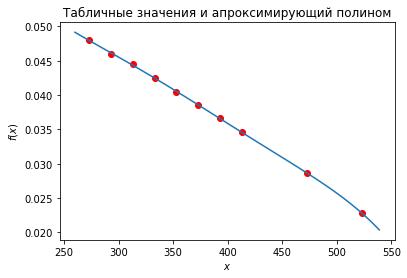

In [363]:
diff_graph(sygma_poly, sygma)

In [364]:
sygma_poly.error()

1.1033246660819587

In [365]:
%%latex
$$\lambda_l,Вт/м*К$$

<IPython.core.display.Latex object>

In [366]:
lambda_l_poly = polinome5(temperature, lambda_l)
lambda_l_poly.latexPrint()

<IPython.core.display.Latex object>

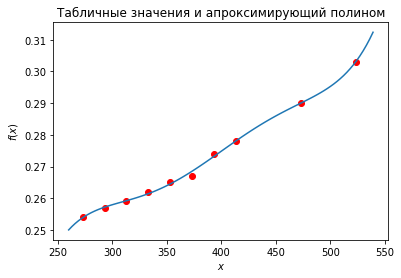

In [367]:
diff_graph(lambda_l_poly, lambda_l)

In [368]:
lambda_l_poly.error()

0.19287646087593688

Рассчитаем значения функций для формул коэффициентов

In [369]:
%%latex
$$B = 2*\frac{\eta_l(T_l)*\delta}{\rho_l(T_l)*H_{ev}(T_l)*K_0*L*S_{inp}} $$

<IPython.core.display.Latex object>

In [370]:
import math
def B(delta):
    return 2 * (ln_nl_poly.approx_func(temp_liquid) * delta) / (p_l_poly.approx_func(temp_liquid) * 
                                                                h_ev_poly.approx_func(temp_liquid) *
                                                                molecule_structure0 * length * space_input)

In [371]:
%%latex
$$D = 128*\frac{\eta_l(T_l)}{\rho_l(T_l)*H_{ev}(T_l)*\pi*d^4_l} $$

<IPython.core.display.Latex object>

In [372]:
def D():
    return 128 * ln_nl_poly.approx_func(temp_liquid) / (p_l_poly.approx_func(temp_liquid) * 
                                                        h_ev_poly.approx_func(temp_liquid) *
                                                       math.pi * diameter_liquid ** 4)

In [373]:
%%latex
$$E = 128*\frac{\eta_v(T_v)}{\rho_v(T_v)*H_{ev}(T_v)*\pi*d^4_v} $$

<IPython.core.display.Latex object>

In [374]:
def E():
    return 128 * n_v_poly.approx_func(temp_vapor) / (ln_pv_poly.approx_func(temp_vapor) * 
                                                        h_ev_poly.approx_func(temp_vapor) *
                                                       math.pi * diameter_vapor ** 4)

In [375]:
%%latex
$$Re(QL)=4*\frac{QL}{\pi*\eta_v(T_v)*H_{ev}(T_v)*d_v*L} $$

<IPython.core.display.Latex object>

In [376]:
def Re(QL):
    return 4 * QL / (math.pi * n_v_poly.approx_func(temp_vapor) * 
                    h_ev_poly.approx_func(temp_vapor) *
                    diameter_vapor * length)

In [377]:
%%latex
$$C(QL)=0,6328*Re(QL)^{0,75}*\frac{\eta_v(T_v)}{\rho_v(T_v)*H_{ev}(T_v)*\pi*d^4_v} $$

<IPython.core.display.Latex object>

In [378]:
def C(QL):
    return 0.6328 * Re(QL) ** 0.75 * n_v_poly.approx_func(temp_vapor) / (ln_pv_poly.approx_func(temp_vapor) * 
                                                                        h_ev_poly.approx_func(temp_vapor) *
                                                                        math.pi * diameter_vapor ** 4)

In [379]:
%%latex
$$ 
a1 =
  \begin{cases}
    QL*(E+D)       & \quad \text{,если } Re(QL) \leq 2100\\
    QL*(C(QL)+D)   & \quad \text{,если } Re(QL) > 2100\\
  \end{cases}
$$

<IPython.core.display.Latex object>

In [380]:
def a1(QL):
    if Re(QL) > 2100:
        return QL * (C(QL)+D())
    else:
        return QL * (E() + D())

In [381]:
%%latex
$$
r_{1,2}=\frac{\sigma \pm \sqrt{\sigma^2-a1(QL)*QL*B(\delta)}}{a1(QL)}
$$

<IPython.core.display.Latex object>

In [382]:
def r1(delta,QL):
    return (sygma_poly.approx_func(temp_vapor) + (sygma_poly.approx_func(temp_vapor) ** 2
                                                    - a1(QL) * QL * B(delta)) ** 0.5)

def r2(delta,QL):
    return (sygma_poly.approx_func(temp_vapor) - (sygma_poly.approx_func(temp_vapor) ** 2
                                                    - a1(QL) * QL * B(delta)) ** 0.5)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


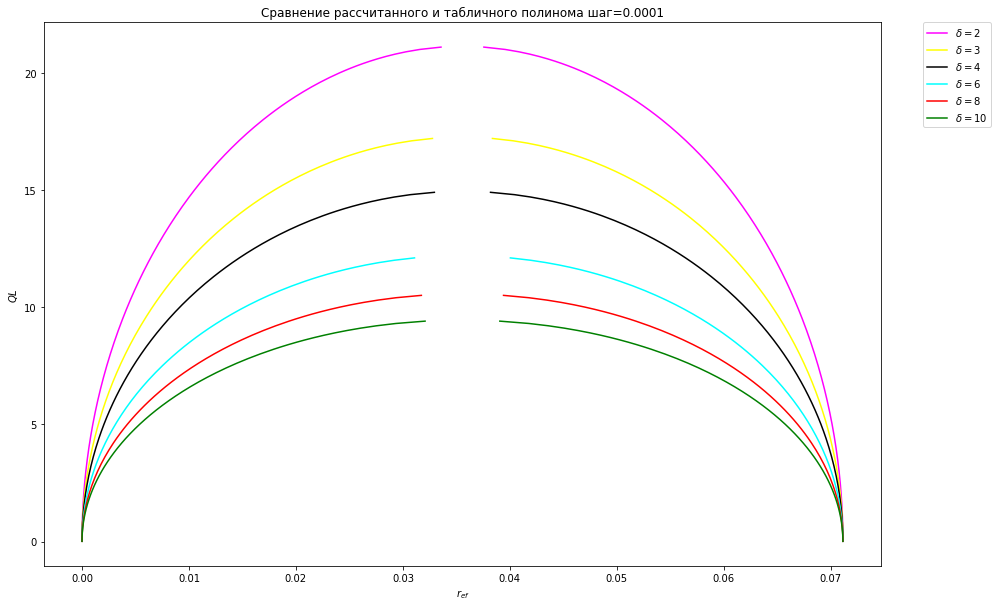

In [383]:
r1_result = []
r2_result = []
QL_result = []
        
QL_range = range(1,2200,10)

for i in QL_range:
    QL = i/100
    QL_result.append(QL)    
    
def r_result(number,delta):
    result = []
    for i in QL_range:
        QL = i/100
        if number == 1:
            result.append(r1(delta,QL))
        else:
            result.append(r2(delta,QL))
    return result

%matplotlib inline

width = 15
height = 10
line_result = plt.figure(figsize=(width, height))

line_result = plt.plot(r_result(1,2), QL_result, color='magenta',label=r'$\delta = 2$')
line_result = plt.plot(r_result(2,2), QL_result, color='magenta',label=r'$\delta = 2$')

line_result = plt.plot(r_result(1,3), QL_result, color='yellow',label=r'$\delta = 3$')
line_result = plt.plot(r_result(2,3), QL_result, color='yellow',label=r'$\delta = 3$')

line_result = plt.plot(r_result(1,4), QL_result, color='black',label=r'$\delta = 4$')
line_result = plt.plot(r_result(2,4), QL_result, color='black',label=r'$\delta = 4$')

line_result = plt.plot(r_result(1,6), QL_result, color='cyan',label=r'$\delta = 6$')
line_result = plt.plot(r_result(2,6), QL_result, color='cyan',label=r'$\delta = 6$')

line_result = plt.plot(r_result(1,8), QL_result, color='red',label=r'$\delta = 8$')
line_result = plt.plot(r_result(2,8), QL_result, color='red',label=r'$\delta = 8$')


line_result = plt.plot(r_result(1,10), QL_result, color='green',label=r'$\delta = 10$')
line_result = plt.plot(r_result(2,10), QL_result, color='green',label=r'$\delta = 10$')

line_h_ev_example = plt.xlabel(r'$r_{ef}$')
line_h_ev_example = plt.ylabel(r'$QL$')
line_h_ev_example = plt.title('Сравнение рассчитанного и табличного полинома шаг=0.0001')

line_result = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [387]:
r1_result = []
r2_result = []
QL_result = []
        
QL_range = range(1,500,1)

for i in QL_range:
    QL = i/10000
    QL_result.append(QL)    
    
def r_result(number,delta):
    result = []
    for i in QL_range:
        QL = i/100
        if number == 1:
            result.append(r1(delta,QL))
        else:
            result.append(r2(delta,QL))
    return result

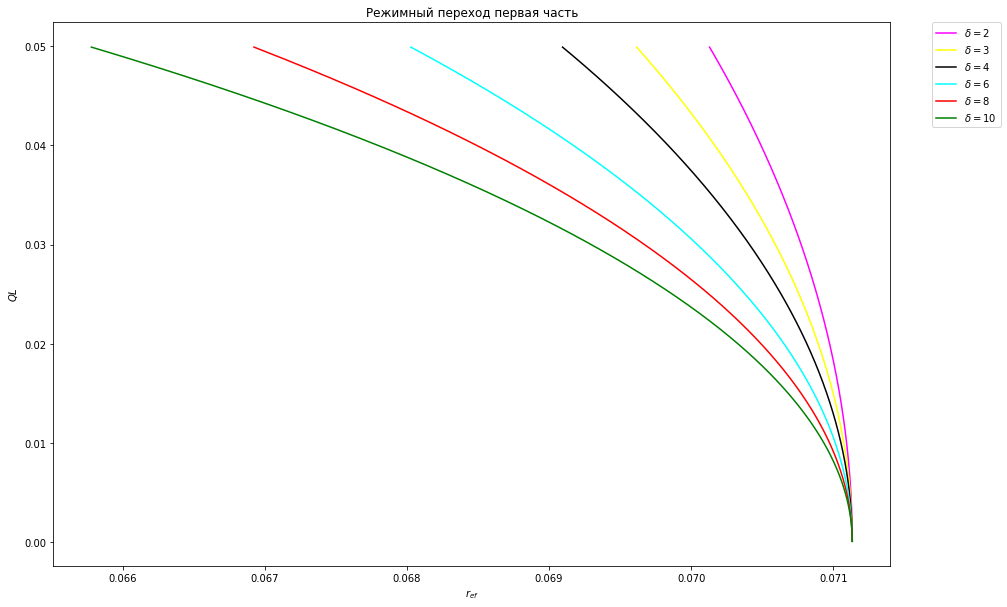

In [394]:
%matplotlib inline

width = 15
height = 10
line_result = plt.figure(figsize=(width, height))

line_result = plt.plot(r_result(1,2), QL_result, color='magenta',label=r'$\delta = 2$')

line_result = plt.plot(r_result(1,3), QL_result, color='yellow',label=r'$\delta = 3$')

line_result = plt.plot(r_result(1,4), QL_result, color='black',label=r'$\delta = 4$')
line_result = plt.plot(r_result(1,6), QL_result, color='cyan',label=r'$\delta = 6$')

line_result = plt.plot(r_result(1,8), QL_result, color='red',label=r'$\delta = 8$')

line_result = plt.plot(r_result(1,10), QL_result, color='green',label=r'$\delta = 10$')

line_h_ev_example = plt.xlabel(r'$r_{ef}$')
line_h_ev_example = plt.ylabel(r'$QL$')
line_h_ev_example = plt.title('Режимный переход первая часть')

line_result = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

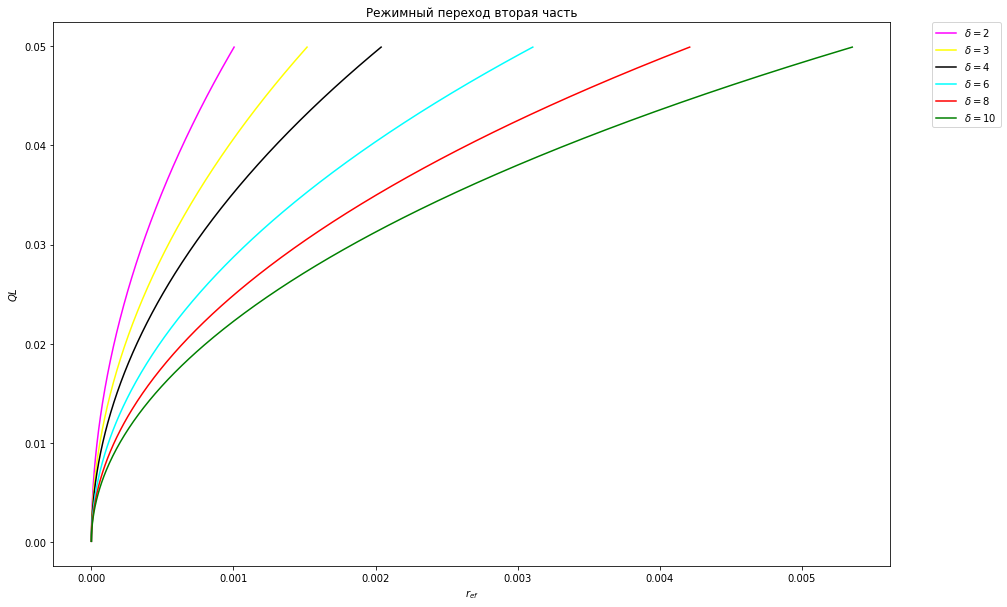

In [395]:
%matplotlib inline

width = 15
height = 10
line_result = plt.figure(figsize=(width, height))

line_result = plt.plot(r_result(2,2), QL_result, color='magenta',label=r'$\delta = 2$')

line_result = plt.plot(r_result(2,3), QL_result, color='yellow',label=r'$\delta = 3$')

line_result = plt.plot(r_result(2,4), QL_result, color='black',label=r'$\delta = 4$')

line_result = plt.plot(r_result(2,6), QL_result, color='cyan',label=r'$\delta = 6$')

line_result = plt.plot(r_result(2,8), QL_result, color='red',label=r'$\delta = 8$')

line_result = plt.plot(r_result(2,10), QL_result, color='green',label=r'$\delta = 10$')

line_h_ev_example = plt.xlabel(r'$r_{ef}$')
line_h_ev_example = plt.ylabel(r'$QL$')
line_h_ev_example = plt.title('Режимный переход вторая часть')

line_result = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)